# Laptop Price Prediction

## Assignment
Your task is to define and train a machine learning model for predicting the price of a laptop (buynow_price column in the dataset) based on its attributes. When testing and comparing your models, aim to minimize the RMSE measure.

## Data Description
The dataset has already been randomly divided into the training, validation and test sets. It is stored in 3 files: train_dataset.json, val_dataset.json and test_dataset.json respectively. Each file is JSON saved in orient=’columns’ format.

### Example how to load the data:

### Practicalities

Prepare a model in Jupyter Notebook using Python. Only use the training data for training the model and check the model's performance on unseen data using the test dataset to make sure it does not overfit.

Ensure that the notebook reflects your thought process. It’s better to show all the approaches, not only the final one (e.g. if you tested several models, you can show all of them). The path to obtaining the final model should be clearly shown.

#### To download the dataset <a href="https://drive.google.com/drive/folders/1HYUkqZVEXi-691h9I2j_uaYxedJa-f-S?usp=sharing"> Click here </a>

In [43]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# reading datasets
df_test = pd.read_json('test_dataset.json')
df_train = pd.read_json('train_dataset.json')
df_val = pd.read_json('val_dataset.json')

In [45]:
df_test.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
5124,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,2,8 gb,[windows 10 home],hdd,"[keyboard, touchpad]","[SD card reader, camera, microphone]",ddr4,2.0,intel core i3,new,1000.0,producer warranty,"15"" - 15.9""",2369.0
9595,integrated graphics,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",1920 x 1080,2,4 gb,[windows 10 home],ssd,"[keyboard, touchpad]","[SD card reader, camera, microphone]",ddr4,2.0,intel core i3,new,240.0,producer warranty,"15"" - 15.9""",2299.0
4926,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,16 gb,[windows 10 home],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,new,1500.0,producer warranty,"15"" - 15.9""",5999.0
2607,integrated graphics,"[lan 10/100/1000 mbps, nfc (near field communi...",3200 x 1800,2,8 gb,[windows 10 home],ssd,"[keyboard, touchpad]","[camera, speakers, microphone]",ddr3l,NaN,intel core i5,new,256.0,producer warranty,"13"" - 13.9""",3399.0
1185,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,4 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,1.6,intel celeron dual-core,new,500.0,producer warranty,"15"" - 15.9""",1299.0


In [46]:
print(df_test['RAM type'].value_counts())

RAM type
ddr4     879
ddr3     358
ddr3l    146
Name: count, dtype: int64


In [47]:
df_test['CPU cores'] = pd.to_numeric(df_test['CPU cores'], errors='coerce').fillna(0).astype('int64')
df_train['CPU cores'] = pd.to_numeric(df_train['CPU cores'], errors='coerce').fillna(0).astype('int64')
df_val['CPU cores'] = pd.to_numeric(df_val['CPU cores'], errors='coerce').fillna(0).astype('int64')

df_test['RAM size'] = df_test['RAM size'].str.extract(r"(\d+)").astype('float64')
df_train['RAM size'] = df_train['RAM size'].str.extract(r"(\d+)").astype('float64')
df_val['RAM size'] = df_val['RAM size'].str.extract(r"(\d+)").astype('float64')

In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1571 entries, 5124 to 1371
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   graphic card type       1469 non-null   object 
 1   communications          1401 non-null   object 
 2   resolution (px)         1442 non-null   object 
 3   CPU cores               1571 non-null   int64  
 4   RAM size                1468 non-null   float64
 5   operating system        1431 non-null   object 
 6   drive type              1479 non-null   object 
 7   input devices           1428 non-null   object 
 8   multimedia              1415 non-null   object 
 9   RAM type                1383 non-null   object 
 10  CPU clock speed (GHz)   1361 non-null   float64
 11  CPU model               1464 non-null   object 
 12  state                   1571 non-null   object 
 13  drive memory size (GB)  1466 non-null   float64
 14  warranty                1571 non-null   ob

In [49]:
df_test.isna().sum()

graphic card type         102
communications            170
resolution (px)           129
CPU cores                   0
RAM size                  103
operating system          140
drive type                 92
input devices             143
multimedia                156
RAM type                  188
CPU clock speed (GHz)     210
CPU model                 107
state                       0
drive memory size (GB)    105
warranty                    0
screen size                76
buynow_price                0
dtype: int64

In [50]:
df_train.isna().sum()

graphic card type         294
communications            450
resolution (px)           350
CPU cores                   0
RAM size                  254
operating system          376
drive type                257
input devices             390
multimedia                401
RAM type                  499
CPU clock speed (GHz)     530
CPU model                 322
state                       0
drive memory size (GB)    272
warranty                    0
screen size               197
buynow_price                0
dtype: int64

In [51]:
df_val.isna().sum()

graphic card type         100
communications            162
resolution (px)           129
CPU cores                   0
RAM size                   93
operating system          134
drive type                 86
input devices             145
multimedia                151
RAM type                  177
CPU clock speed (GHz)     196
CPU model                 104
state                       0
drive memory size (GB)    104
warranty                    0
screen size                73
buynow_price                0
dtype: int64

In [52]:
# removing NAN values from dataset
df_test.dropna(inplace=True)
df_train.dropna(inplace=True)
df_val.dropna(inplace=True)

In [53]:
# Convert lists to strings for proper encoding
df_test = df_test.map(lambda x: ', '.join(x) if isinstance(x, list) else x)
df_train = df_train.map(lambda x: ', '.join(x) if isinstance(x, list) else x)
df_val = df_val.map(lambda x: ', '.join(x) if isinstance(x, list) else x)

## Label Encoding for train, test and val dataset

In [54]:
# Apply Label Encoding for test dataset
from sklearn.preprocessing import LabelEncoder

df_test_categorical = df_test.select_dtypes(include=['object'])
encoder = LabelEncoder()

for column in df_test_categorical.columns:
    df_test[column] = encoder.fit_transform(df_test[column])

In [55]:
# Apply Label Encoding for test dataset
from sklearn.preprocessing import LabelEncoder

df_train_categorical = df_train.select_dtypes(include=['object'])
encoder = LabelEncoder()

for column in df_train_categorical.columns:
    df_train[column] = encoder.fit_transform(df_train[column])

In [60]:
# Apply Label Encoding for val dataset
from sklearn.preprocessing import LabelEncoder

df_val_categorical = df_val.select_dtypes(include=['object'])
encoder = LabelEncoder()

for column in df_val_categorical.columns:
    df_val[column] = encoder.fit_transform(df_val[column])

In [62]:
df_test.columns

Index(['graphic card type', 'communications', 'resolution (px)', 'CPU cores',
       'RAM size', 'operating system', 'drive type', 'input devices',
       'multimedia', 'RAM type', 'CPU clock speed (GHz)', 'CPU model', 'state',
       'drive memory size (GB)', 'warranty', 'screen size', 'buynow_price'],
      dtype='object')

## Train Test and split


In [72]:
X_train = df_train.drop('buynow_price', axis=1)
y_train = df_train['buynow_price']

X_test = df_test.drop('buynow_price', axis=1)
y_test = df_test['buynow_price']

In [73]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Linear Regression Performance:
Mean Absolute Error: 741.6631
Mean Squared Error: 901650.6630
R2 Score: 0.6819


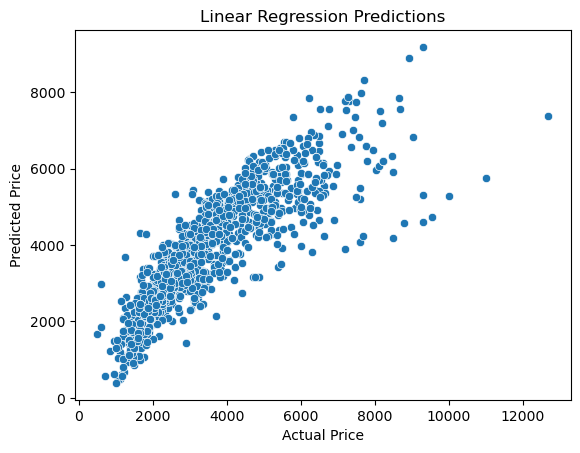


Random Forest Regressor Performance:
Mean Absolute Error: 545.9473
Mean Squared Error: 747184.9452
R2 Score: 0.7364


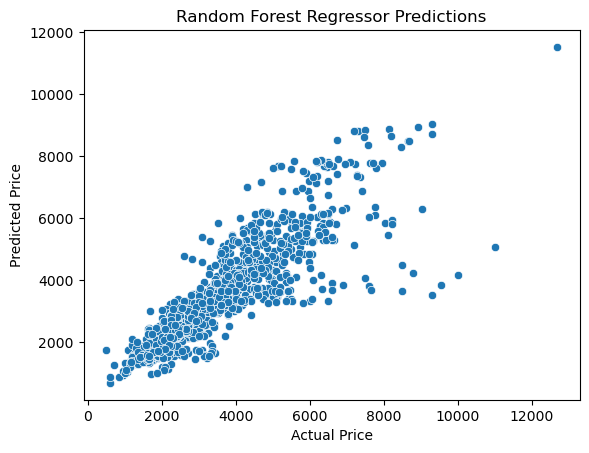


Gradient Boosting Regressor Performance:
Mean Absolute Error: 598.3155
Mean Squared Error: 761740.9121
R2 Score: 0.7313


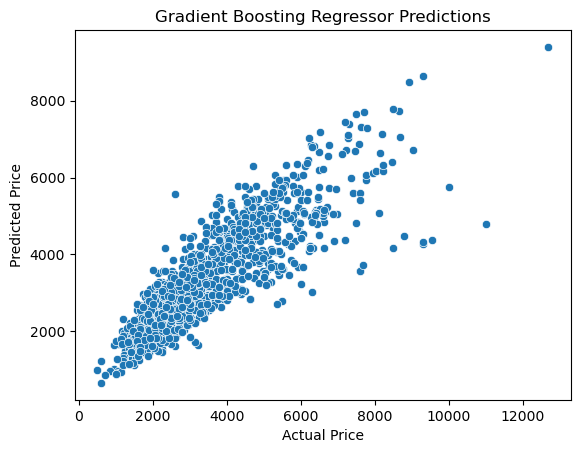


Final Model Performance:
Mean Absolute Error: 545.9473
Mean Squared Error: 747184.9452
R2 Score: 0.7364


In [77]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Trying different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Training and evaluating models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name} Performance:")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"{name} Predictions")
    plt.show()

# Choosing the best model based on R2 score
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_final_pred = best_model.predict(X_test)

# Final Model Evaluation
print("\nFinal Model Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_final_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_final_pred):.4f}")
print(f"R2 Score: {r2_score(y_test, y_final_pred):.4f}")

## Hyperparameter Tuning for Random Forest Regressor


In [79]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning for Random Forest Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and model training
best_params = grid_search.best_params_
print("\nBest Hyperparameters:", best_params)

best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)
y_final_pred = best_model.predict(X_test)

# Final Model Evaluation
print("\nFinal Tuned Model Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_final_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_final_pred):.4f}")
print(f"R2 Score: {r2_score(y_test, y_final_pred):.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Final Tuned Model Performance:
Mean Absolute Error: 546.1500
Mean Squared Error: 746864.2999
R2 Score: 0.7365
